In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import seaborn as sns

from netam import framework, models
from netam.common import print_parameter_count

In [2]:
train_df, val_df = framework.load_shmoof_dataframes("/Users/matsen/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv", val_nickname="51")#, sample_count=5000)

In [3]:
kmer_length = 5
site_count = 500

train_dataset = framework.SHMoofDataset(train_df, kmer_length=kmer_length, site_count=site_count)
val_dataset = framework.SHMoofDataset(val_df, kmer_length=kmer_length, site_count=site_count)

print(f"we have {len(train_dataset)} training examples and {len(val_dataset)} validation examples")

we have 26592 training examples and 22424 validation examples


In [4]:
model = models.FivemerModel()
burrito = framework.SHMBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=1e-7)
print_parameter_count(model)
print("starting training...")
losses = burrito.train(epochs=100)
burrito.save_crepe("../pretrained/fivemer")
losses.tail()

kmer_embedding: 1025 parameters
-----
total: 1025 parameters
starting training...


Epoch:  30%|███       | 30/100 [00:25<00:59,  1.19it/s, loss_diff=-3.111e-08, lr=3.2e-5, val_loss=0.0615] 


,train_loss,val_loss
26,0.060777,0.061501
27,0.060777,0.061501
28,0.060776,0.061501
29,0.060777,0.061501
30,0.060776,0.061500


Training with regularization coefficient 0


Epoch:  58%|█████▊    | 29/50 [00:24<00:17,  1.18it/s, loss_diff=-7.289e-08, lr=3.2e-5, val_loss=0.0615] 


Training with regularization coefficient 1e-08


Epoch:  60%|██████    | 30/50 [00:25<00:16,  1.18it/s, loss_diff=-2.244e-08, lr=3.2e-5, val_loss=0.0615] 


Training with regularization coefficient 1e-07


Epoch:  64%|██████▍   | 32/50 [00:27<00:15,  1.17it/s, loss_diff=2.489e-08, lr=3.2e-5, val_loss=0.0615]  


Training with regularization coefficient 1e-06


Epoch:  60%|██████    | 30/50 [00:25<00:17,  1.17it/s, loss_diff=1.505e-08, lr=3.2e-5, val_loss=0.06152]  


Training with regularization coefficient 1e-05


Epoch:  64%|██████▍   | 32/50 [00:27<00:15,  1.16it/s, loss_diff=-9.99e-09, lr=3.2e-5, val_loss=0.06198]  


Training with regularization coefficient 0.0001


Epoch:  64%|██████▍   | 32/50 [00:27<00:15,  1.15it/s, loss_diff=1.992e-07, lr=3.2e-5, val_loss=0.06413]  


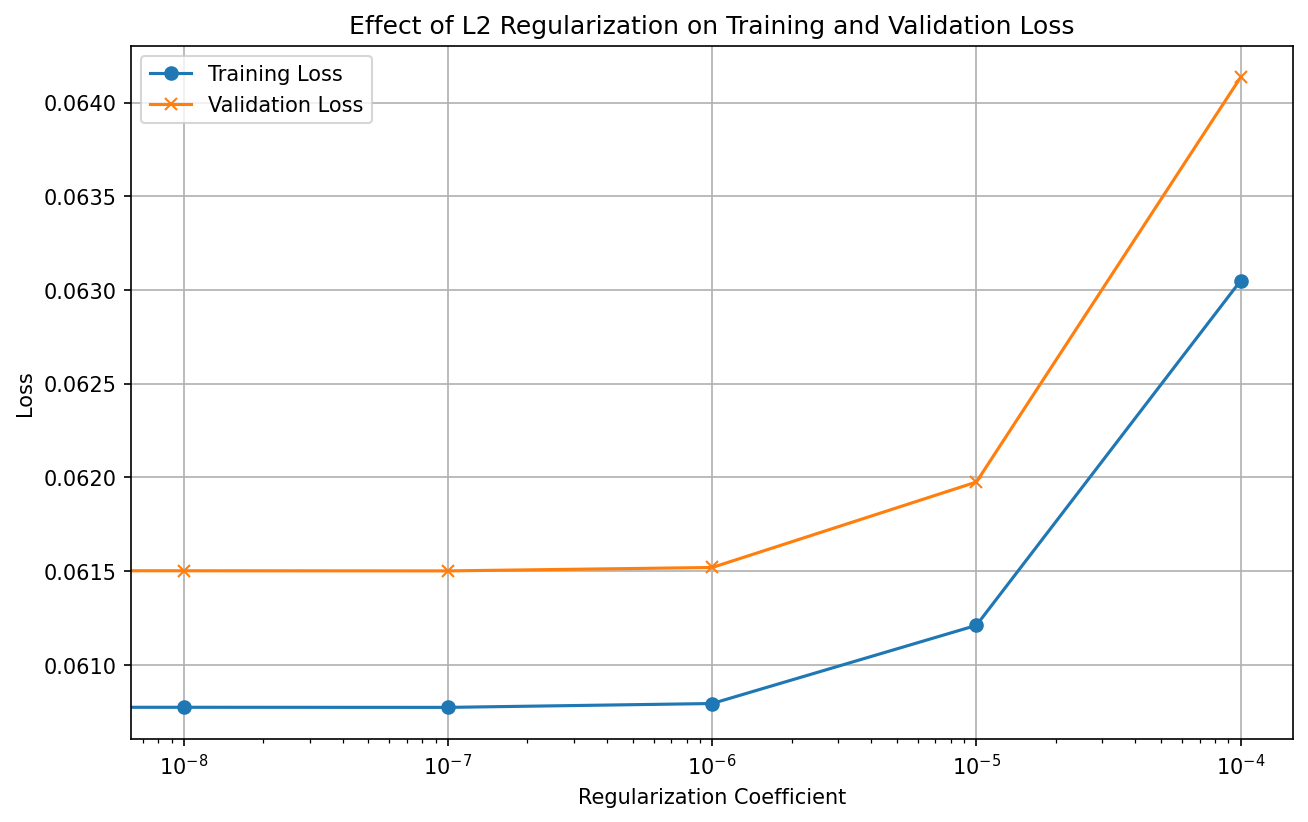

In [5]:
regularization_coeffs = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
results = []

for coeff in regularization_coeffs:
    print(f"Training with regularization coefficient {coeff}")
    model = models.FivemerModel()
    burrito = framework.SHMBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=coeff)
    loss_history = burrito.train(epochs=50)
    final_training_loss = loss_history['train_loss'].iloc[-1]
    final_validation_loss = loss_history['val_loss'].iloc[-1]

    results.append({
        'Regularization': coeff,
        'Final_Training_Loss': final_training_loss,
        'Final_Validation_Loss': final_validation_loss
    })

regularization_results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Training_Loss'], label='Training Loss', marker='o')
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Validation_Loss'], label='Validation Loss', marker='x')

plt.xscale('log')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Loss')
plt.title('Effect of L2 Regularization on Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
regularization_results_df

,Regularization,Final_Training_Loss,Final_Validation_Loss
0,0.000000e+00,0.060778,0.061503
1,1.000000e-08,0.060774,0.061502
2,1.000000e-07,0.060773,0.061502
3,1.000000e-06,0.060794,0.061520
4,1.000000e-05,0.061211,0.061976
5,1.000000e-04,0.063050,0.064135
